# Axes

The axes are referenced to the tool/carriage:

X - moves towards/away from the tool (perpendicular to the carriage).

Y - moves along the carriage axis

Z - Vertical positioning, rarely used.

A - Yaw of the robot. I believe this rotates around the delivery point of the fibre (the tip of the final roller). The rotation is around the Z axis.

B - Rotation around Y axis (I think), rarely used.

C - Rotation around X axis (I think), rarely used.

E1 - Rotation of the payout eye. 

E2 - Not used, related to the tape placement head I believe.

E3 - This rotates both chucks (headstock and tailstock) together, in a synchronised fashion. 

E4 - This rotates the tailstock ONLY. For example, if you wish to only rotate the headstock, you would require equivalent +ve E3 and -ve E4 motion

In [1]:
# Cylinder is radius 125 and centred on X=0
# Block0 is the helical zigzagging up and down the cylinder
# the video shows the E1 pulling the filament 
# over a roller, perpendicular to the force, so should 
# be perpendicular to the top tangent of the cylinder in the cylindrical section
# This point should run smoothly in a straight line without slipping



In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import re
fname = "output/Vessel04speedt3.src"
ftext = open(fname, "r").read()


In [3]:
P = { "E3":0.0, "E4":0.0 }
def linapply(y, brel):
    for e in y.split(","):
        k, v = e.split()
        if brel: # and k in "AXYZ":
            P[k] += float(v)
        else:
            P[k] = float(v)
            
reforblk = "(?s)LIN \{(.*?)\}\nHALT\n.*?PLY[^\(]*\(([^\)]*)\).*?FOR N_CYC=1 to (\d+)\n(.*?)ENDFOR"
forblks = re.findall(reforblk, ftext)
len(forblks)

41

In [6]:
Pblocks = [ ]
for bknum, forblk in enumerate(forblks):
    P["E3"] = P["E4"] = 0
    linapply(forblk[0], False)
    Ps = [ P.copy() ]
    #print(P["Y"], forblk[0])
    lins = re.findall("LIN_REL \{(.*?)\}", forblk[3])
    k1 = Ps[-1]
    Ncycles = int(forblk[2])
    for N_CYC in range(Ncycles):
        for lin in lins:
            linapply(lin, True)
            Ps.append(P.copy())
            #assert bknum <= 5 or P.get("E3", 0) < 10000, (bknum, P)
    Pblocks.append({"Ps":Ps, "plytype":forblk[1], "Ncycles":Ncycles})

In [9]:
forblks[0][1]

'Helical'

In [10]:
print([(Pblock["plytype"], len(Pblock["Ps"])) for Pblock in Pblocks])

[('Helical', 3305), ('Connector', 85), ('Circ', 10), ('Helical', 190), ('Connector', 2), ('Circ', 10), ('Connector', 83), ('Helical', 3697), ('Connector', 34), ('Helical', 904), ('Connector', 88), ('Helical', 3585), ('Connector', 32), ('Helical', 1591), ('Connector', 43), ('Helical', 3473), ('Connector', 31), ('Helical', 2215), ('Connector', 31), ('Helical', 2449), ('Connector', 25), ('Helical', 2353), ('Connector', 27), ('Helical', 1541), ('Connector', 46), ('Helical', 3364), ('Connector', 27), ('Helical', 963), ('Connector', 31), ('Helical', 2549), ('Connector', 35), ('Helical', 689), ('Connector', 98), ('Helical', 4390), ('Connector', 32), ('Circ', 10), ('Helical', 393), ('Connector', 7), ('Circ', 10), ('Connector', 100), ('Helical', 4641)]


In [6]:
Pblocks[4]["Ncycles"], len(Pblocks[4]["Ps"])

(1, 2)

Connector 1


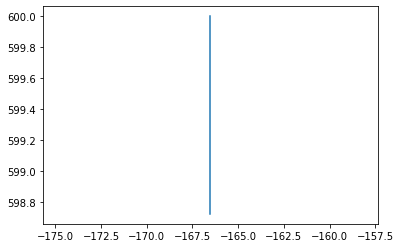

In [7]:
plt.figure()
for Pblock in Pblocks[4:5]:
    Ps = Pblock["Ps"]
    print(Pblock["plytype"], Pblock["Ncycles"])
    Xs = [ p["X"]  for p in Ps ]
    Ys = [ p["Y"]  for p in Ps ]
    Zs = [ p["Z"]  for p in Ps ]
    As = [ p["A"]  for p in Ps ]

    #plt.plot(Xs, Ys)
    plt.plot(Xs, Ys)
plt.show()
    

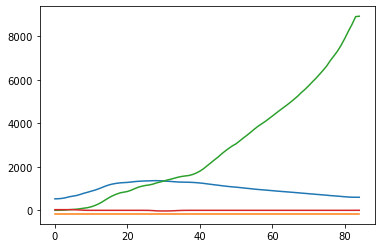

In [8]:
plt.figure()
for Pblock in Pblocks[1:2]:
    Ps = Pblock["Ps"]
    Xs = [ p["X"]  for p in Ps ]
    Ys = [ p["Y"]  for p in Ps ]
    Zs = [ p["Z"]  for p in Ps ]
    As = [ p["A"]  for p in Ps ]
    E1s = [ p["E1"]  for p in Ps ]
    E3s = [ p["E3"]  for p in Ps ]

    #plt.plot(Xs, Ys)
    plt.plot(Ys)
    plt.plot(Xs)
#    plt.plot(E1s)
    plt.plot(E3s)
    plt.plot(As)
plt.show()
    

In [126]:
min(Xs), max(Xs)

(-164.90400000000005, -72.67100000000002)

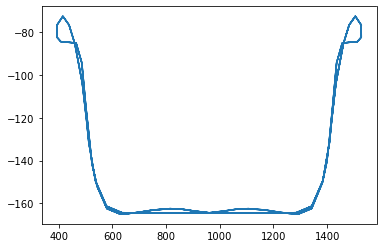

In [99]:
plt.plot(Ys, Xs)


In [9]:
(max(Ys)+min(Ys))/2
Xs = [ (p["A"])  for p in Ps ]
min(Xs), max(Xs)
Ps = Pblock["Ps"]
len(Ps)
(max(Ys),min(Ys))
Pblock["plytype"]
min(As), max(As)


(-30.0, 30.0)

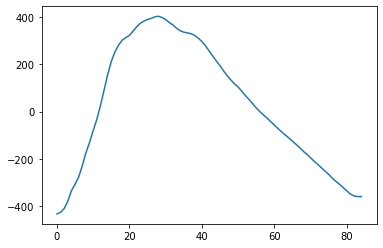

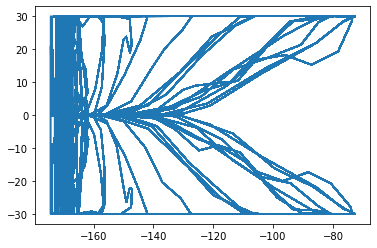

In [11]:
Xs = [ p["X"]  for p in Ps ]
Ys = [ p["Y"]  for p in Ps ]
Zs = [ p["Z"]  for p in Ps ]
As = [ p["A"]  for p in Ps ]

#plt.plot(Xs, Ys)
plt.figure()
plt.plot(Xs, As)
plt.show()

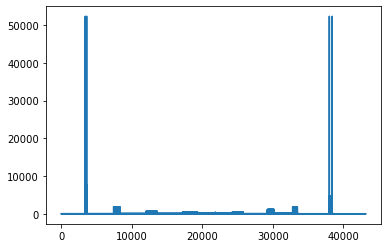

In [69]:
Xs = [ p["X"]  for p in Ps ]
Ys = [ p["Y"]  for p in Ps ]
Zs = [ p["Z"]  for p in Ps ]
E3s = [ p["E3"]  for p in Ps ]

#plt.plot(Xs, Ys)
plt.figure()
#plt.plot(Xs, E3s)
plt.plot(E3s)
plt.show()

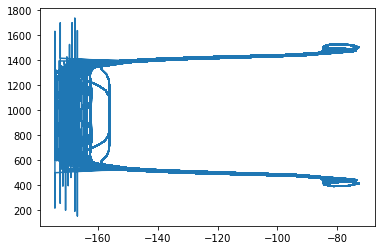

In [12]:
plt.figure()
plt.plot(Xs, Ys)
#plt.plot(Ys)
plt.show()

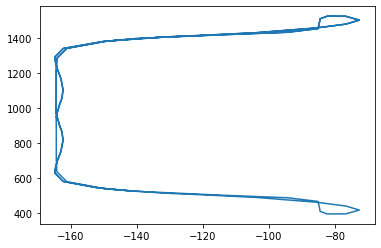

In [13]:
plt.figure()
plt.plot(Xs[:100], Ys[:100])


#cylinder is radius 125

In [14]:
Ps[0]

{'E3': 0.0,
 'E4': 0.0,
 'X': -141.371,
 'Y': 523.534,
 'Z': 0.0,
 'A': 30.0,
 'B': 0.0,
 'C': 0.0,
 'E1': -59.199}

In [15]:
import numpy, math

sPs = Ps[1100:1800]


ke3 = numpy.array([ math.radians(p.get("E3", 0)%360)  for p in sPs ])
kx = numpy.array([ p.get("X", 0)  for p in sPs ])
ky = numpy.array([ p.get("X", 0)  for p in sPs ])

Rx = kx*numpy.cos(ke3)
Rz = kx*numpy.sin(ke3)
Ry = ky


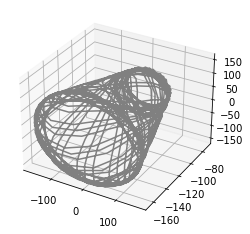

In [16]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(Rx, Ry, Rz, 'gray')
plt.show()



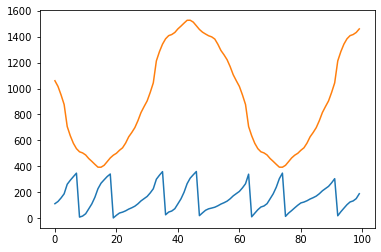

In [17]:
sPs = Ps[1100:1200]
plt.plot([ p.get("E3", 0)%360  for p in sPs ])
plt.plot([ p.get("Y", 0)  for p in sPs ])



In [20]:
len(sPs)

100

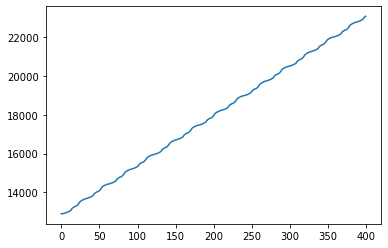

In [21]:
plt.plot([ p.get("E3", 0)  for p in Ps[500:900]])


In [22]:
from barmesh.tribarmes import trianglebarmesh
from barmesh.basicgeo import P3
import barmesh.geodesicUtils as geo

In [23]:
fname = 'geometry/PV/PV-med.stl'
tbm = trianglebarmesh.TriangleBarMesh(fname)

In [24]:
tbm.bars[0].nodeback.p, tbm.bars[0].nodefore.p



(P3(-125.00025177001953, 73.01226806640625, 0.0),
 P3(-125.00025177001953, 83.01226806640625, 0.0))

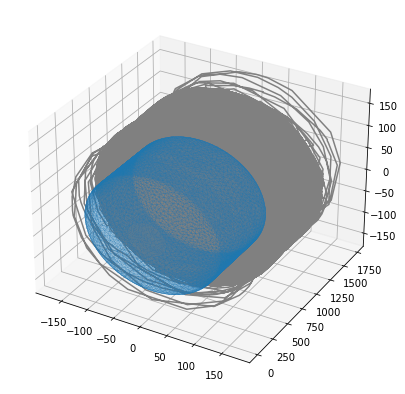

In [25]:
sPs = Ps[1100:1800]
sPs = Ps

ke3 = numpy.array([ math.radians(p.get("E3", 0)%360)  for p in sPs ])
kx = numpy.array([ p.get("X", 0)  for p in sPs ])
ky = numpy.array([ p.get("Y", 0)  for p in sPs ])

Rx = kx*numpy.cos(ke3)
Rz = kx*numpy.sin(ke3)
Ry = ky


from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
lseq = [[bar.nodeback.p, bar.nodefore.p] for bar in tbm.bars]
Line3DCollection(lseq)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')

ax.add_collection3d(Line3DCollection(lseq, linewidths=0.2))
ax.plot3D(Rx, Ry, Rz, 'gray')


plt.show()




In [121]:
cyl = [ node.p  for node in tbm.nodes  if 400<node.p.y<450]
#plt.scatter([p.x for p in cyl], [p.z for p in cyl])
min([P3(p.x, 0, p.z).Len() for p in cyl])
max([P3(p.x, 0, p.z).Len() for p in cyl])


125.00025467727698

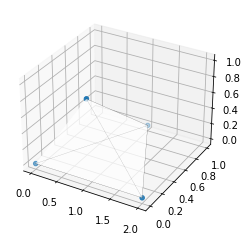

In [31]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0, 2, 1, 1]
y = [0, 0, 1, 0]
z = [0, 0, 0, 1]

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]

tupleList = list(zip(x, y, z))

poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=1, alpha=0.5))
ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=0.2, linestyles=':'))

plt.show()

In [32]:
poly3d

[[(0, 0, 0), (2, 0, 0), (1, 1, 0)],
 [(0, 0, 0), (2, 0, 0), (1, 0, 1)],
 [(0, 0, 0), (1, 1, 0), (1, 0, 1)],
 [(2, 0, 0), (1, 1, 0), (1, 0, 1)]]